In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import statistics
sns.reset_defaults()
sns.set_context("paper")
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "font.size": 14,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}

plt.rcParams.update(tex_fonts)

In [2]:
# accuracy by k value
# total number of reads: 1490410
vals_k = list(range(2, 13))
data_k = []

for k in vals_k:
    path = "mapquik-" + str(k) + "-31.stats"
    mapped_q60 = 0
    wrong_q60 = 0
    mapped_q0 = 0
    wrong_q0 = 0
    with open(path) as fm:
        for line in fm:
            spl = line.strip().split('\t')
            #print(spl)
            if mapped_q60 == 0:
                mapped_q60 = int(spl[0])
                wrong_q60 = int(spl[1])
            else:
                mapped_q0 = int(spl[0])
                wrong_q0 = int(spl[1])
    data_k += [(100.0*((mapped_q60 + mapped_q0) / 1490410), 100.0*(mapped_q60 / (mapped_q60 + mapped_q0)), 100.0*(1.0 - ((wrong_q60 / mapped_q60))))]

k_df = pd.DataFrame([x for x in data_k],columns=("Reads mapped","Reads mapped at Q$60$","Q$60$ accuracy"),index=vals_k)


In [3]:
# total number of reads: 1490410
vals_l = list(range(10, 32))
data_l = []

for l in vals_l:
    path = "mapquik-5-" + str(l) + ".stats"
    mapped_q60 = 0
    wrong_q60 = 0
    mapped_q0 = 0
    wrong_q0 = 0
    with open(path) as fm:
        for line in fm:
            spl = line.strip().split('\t')
            #print(spl)
            if mapped_q60 == 0:
                mapped_q60 = int(spl[0])
                wrong_q60 = int(spl[1])
            else:
                mapped_q0 = int(spl[0])
                wrong_q0 = int(spl[1])
    data_l += [(100.0*((mapped_q60 + mapped_q0) / 1490410), 100.0*(mapped_q60 / (mapped_q60 + mapped_q0)), 100.0*(1.0 - ((wrong_q60 / mapped_q60))))]

l_df = pd.DataFrame([x for x in data_l],columns=("Reads mapped","Reads mapped at Q$60$","Q$60$ accuracy"),index=vals_l)

In [4]:
# total number of reads: 1490410
vals_d = [x/1000.0 for x in list(range(5, 21))]
data_d = []
for d in vals_d:
    path = "mapquik-5-31-" + str(round(d, 3)) + ".stats"
    mapped_q60 = 0
    wrong_q60 = 0
    mapped_q0 = 0
    wrong_q0 = 0
    with open(path) as fm:
        for line in fm:
            spl = line.strip().split('\t')
            #print(spl)
            if mapped_q60 == 0:
                mapped_q60 = int(spl[0])
                wrong_q60 = int(spl[1])
            else:
                mapped_q0 = int(spl[0])
                wrong_q0 = int(spl[1])
    data_d += [(100.0*((mapped_q60 + mapped_q0) / 1490410), 100.0*(mapped_q60 / (mapped_q60 + mapped_q0)), 100.0*(1.0 - ((wrong_q60 / mapped_q60))))]

d_df = pd.DataFrame([x for x in data_d],columns=("Reads mapped","Reads mapped at Q$60$","Q$60$ accuracy"),index=vals_d)

In [5]:
def adjust(df, a, xlab):
    p = df.plot(ax=a)
    p.set(xlabel=xlab, ylabel='\%')
    p.set(ylim=(92.4, 100.4))
    p.xaxis.set_label_coords(0.5, -0.1)

def adjust_r(df, a):
    ax = df.plot(ax = a, x=df.columns[0], y=df.columns[1], legend=False)
    ax2 = ax.twinx()
    df.plot(ax = ax2, x=df.columns[0], y=df.columns[2], legend=False, color='r')
    ax.set(xlabel = "", ylim=(5, 35))
    ax2.set(xlabel = "", ylim=(7, 13))
    ax.xaxis.set_label_coords(0.5, -0.1)
    handles, labels = ax2.get_legend_handles_labels()
    handles_r, labels_r = ax.get_legend_handles_labels()
    handles.extend(handles_r)
    labels.extend(labels_r)
    ax.legend(handles, labels, loc='lower left')
    return ax, ax2

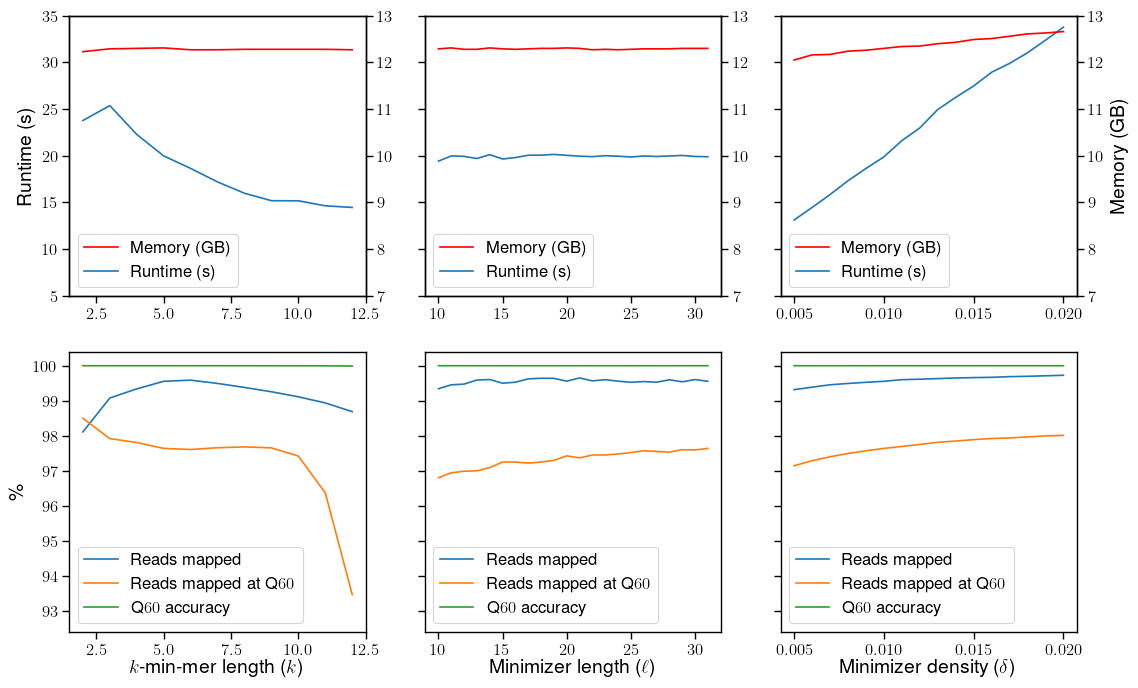

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(13, 8), sharey = "row")

r_k_df = pd.read_csv('k_perf.csv')
r_l_df = pd.read_csv('l_perf.csv')
r_d_df = pd.read_csv('d_perf.csv')

k_ax, k_ax2 = adjust_r(r_k_df, axes[0][0])
l_ax, l_ax2 = adjust_r(r_l_df, axes[0][1])
d_ax, d_ax2 = adjust_r(r_d_df, axes[0][2])

adjust(k_df, axes[1][0], r'$k$-min-mer length ($k$)')
adjust(l_df, axes[1][1], r'Minimizer length ($\ell$)')
adjust(d_df, axes[1][2], r'Minimizer density ($\delta$)')

k_ax.set(ylabel='Runtime (s)')
d_ax2.set(ylabel='Memory (GB)')

fig.align_xlabels()
plt.show()
fig.savefig("kld_analysis_all.pdf", bbox_inches='tight', dpi = 300)
